In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [11]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [13]:
X

array([[  7.16434918,   7.43287858],
       [  4.74854386,   6.76681041],
       [  1.00265272,  -5.44522379],
       ...,
       [  7.15808221, -10.14954694],
       [  8.55439547,  -9.20214067],
       [  0.43872387,  -3.54074505]])

In [15]:
y

array([1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1,
       1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0,
       0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2,
       0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0,
       1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1,
       1, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0,
       2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0,
       2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1,

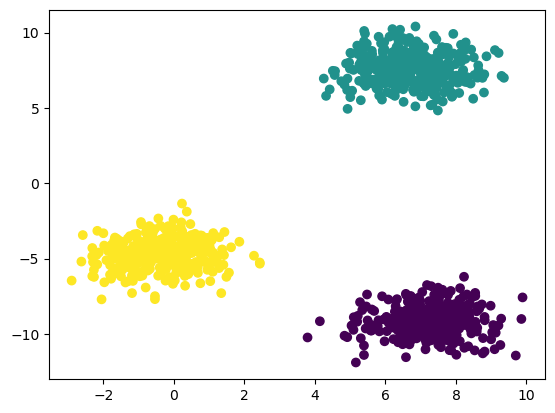

In [17]:
plt.scatter(X[:,0], X[:,1], c=y)

In [19]:
## Standardization-- feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.cluster import KMeans

In [29]:
## Elbow method to Select K value
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Manish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Manish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Manish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Manish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

In [31]:
wcss

[1340.0000000000002,
 666.3870398953296,
 62.71872334930616,
 53.33267093702908,
 41.02875784860492,
 31.03425646520278,
 28.231744361869616,
 25.045804875694074,
 24.88501462055864,
 20.454807965266834]

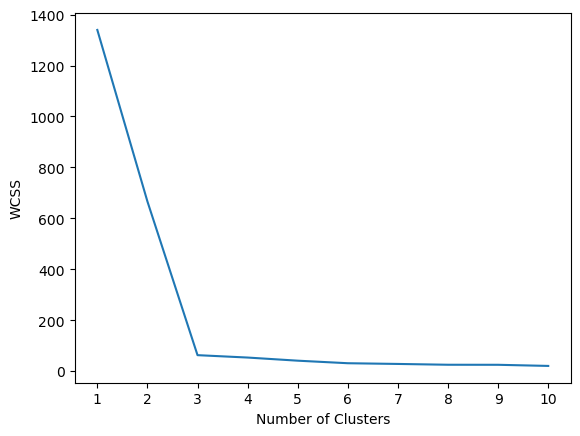

In [33]:
## Plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [41]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [43]:
kmeans.fit_predict(X_train_scaled)

C:\Users\Manish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2,
       0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 1,
       0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2,

In [45]:
y_pred = kmeans.predict(X_test_scaled)

In [47]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2,
       0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       1, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0,
       1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0,
       1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1,
       0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 2,
       0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 1,
       1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2,

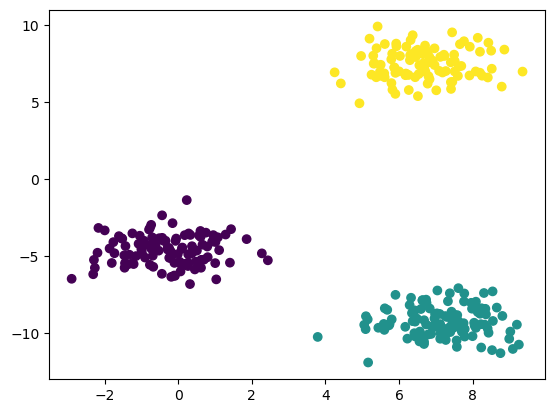

In [49]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

In [57]:
## Validating the K value
## knee Locator
## Silhouette Scoring

In [55]:
from kneed import KneeLocator

In [63]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [65]:
kl.elbow

3

In [67]:
## Silhouette Score
from sklearn.metrics import silhouette_score

In [69]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
    

C:\Users\Manish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Manish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Manish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Manish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

In [71]:
silhouette_coefficients

[0.6071667176260835,
 0.8285750004056938,
 0.6923103946985191,
 0.5505718289002717,
 0.41673508824579747,
 0.3937283595625372,
 0.3707411780662082,
 0.3491591559162402,
 0.3471789713260852]

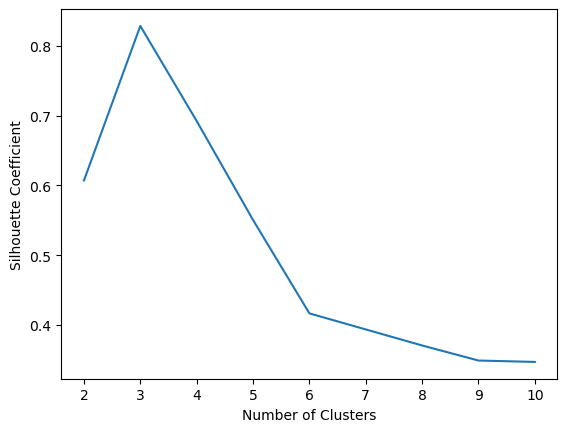

In [75]:
## Ploting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()